# Лабораторная работа 3. Полиномиальная регрессия. Регуляризация

### Задание 1. Полиномиальная регрессия

Загрузите данные из файлов `ml_lab1_train.txt` и `ml_lab1_test.txt` (первая лабораторная работа).

Для $k = 1,2,3,\ldots,10$ найдите полином ${f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость.

Выведите коэффициенты полиномов и нарисуйте их графики на одном чертеже вместе с точками данных $(x_i, y_i)$ (возможно, чертеж стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

Для каждого из полиномов найдите среднеквадратическую ошибку $MSE$ и коэффициент детерминации $R^2$ на обучающих данных и на тестовых данных. Постройте графики зависимости $MSE$ на обучающих и тестовых данных в зависимости от степени полинома (должно быть три графика: один для обучающих данных, второй – для тестовых, третий – для обоих видов данных вместе).

Сделайте вывод, что происходит с ошибкой на обучающих и тестовых данных с увеличением степени полинома.

In [33]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import statistics 
from sklearn.preprocessing import PolynomialFeatures
import random
%matplotlib inline

In [34]:
# Загрузка данных
data_train = np.loadtxt('ml_lab1_train.txt', delimiter=',')
data_test = np.loadtxt('ml_lab1_test.txt', delimiter=',')
# Разделение данных и целевых значений для обучающих данных
X_train = data_train[:,0]
y_train = data_train[:,1]
# Разделение данных и целевых значений для тестовых данных
X_test = data_test[:,0]
y_test = data_test[:,1]

### Полиномиальная регрессия на основе нормального уравнения

In [35]:
# Функция нахождения значений по линейной функции с предсказанными весовыми коэффициентами
def f_reg(X, w):
    X = np.column_stack([np.ones(X.shape[0]).T, X])
    y_predict = np.dot(w, X.T)
    return y_predict

In [36]:
# Функция нахождения вектора весов на основе нормального уравнения (a = 0 без регуляризации, а != 0 с регуляризацией
def get_weight(X, y, a=0):
    X = np.column_stack([np.ones(X.shape[0]).T, X])  
    if np.linalg.det(np.dot(X.T, X)) != 0:
        w = np.dot(np.linalg.inv(np.dot(X.T, X) + a * np.eye(X.shape[1])), np.dot(X.T, y))
    else:
        w = []
    return w  # Возвращаем вектор весов

In [37]:
# Создание полиномиальных признаков
def create_PolynomialFeatures(degree, X_train, X_test):
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly_train = poly.fit_transform(X_train.reshape(-1,1))
    X_poly_test = poly.fit_transform(X_test.reshape(-1,1))
    return X_poly_train, X_poly_test

In [38]:
# Полиномиальная регрессия на основе нормального уравнения
def poly_reg(X_train, X_test, y_train, degree):
    X_poly_train, X_poly_test = create_PolynomialFeatures(i + min_degree, X_train, X_test)    
    w_0 = np.ones(X_poly_train.shape[1] + 1)
    w = get_weight(X_poly_train, y_train)
    return X_poly_train, X_poly_test, w

In [39]:
# Задание 1. Полиномиальная регрессия (на основе нормального уравнения). Нахождение полиномов и значений ошибки

mse_train = []
r2_train = []
mse_test = []
r2_test = []
arr_w = []
arr_y_predict_train = []
arr_y_predict_test = []

count = 10
min_degree = 1
for i in range(count):
    X_poly_train, X_poly_test, w = poly_reg(X_train, X_test, y_train, i + min_degree)
    arr_w.append(w)
    
    y_predict_train = f_reg(X_poly_train, w)
    arr_y_predict_train.append(y_predict_train)
    y_predict_test = f_reg(X_poly_test, w)
    arr_y_predict_test.append(y_predict_test)
    
    mse_train.append(mean_squared_error(y_train, y_predict_train))
    r2_train.append(r2_score(y_train, y_predict_train))
    
    mse_test.append(mean_squared_error(y_test, y_predict_test))
    r2_test.append(r2_score(y_test, y_predict_test))
    print('Степень = ', i + min_degree, '\tw = ', w, '\n\nMSE_train = ', mse_train[i], '\tr2_train = ', r2_train[i], '\nMSE_test = ', mse_test[i], '\tr2_test = ', r2_test[i],'\n\n')

Степень =  1 	w =  [4.43323091 2.2791345 ] 

MSE_train =  0.2968966332625196 	r2_train =  0.6978349896117897 
MSE_test =  0.43512020040488797 	r2_test =  0.6848801332179668 


Степень =  2 	w =  [4.4724765  1.15783169 1.40162851] 

MSE_train =  0.2696989158766912 	r2_train =  0.7255153255796206 
MSE_test =  0.3564762887831226 	r2_test =  0.7418351055001278 


Степень =  3 	w =  [ 4.46073636  1.06501611  1.85975084 -0.3817686 ] 

MSE_train =  0.26949718714796117 	r2_train =  0.7257206339482016 
MSE_test =  0.3553464571518274 	r2_test =  0.7426533446735989 


Степень =  4 	w =  [  4.34116612   1.17180239   6.79409178 -13.05132812   7.9184747 ] 

MSE_train =  0.26106653305792776 	r2_train =  0.7343008884721451 
MSE_test =  0.4417270189284678 	r2_test =  0.6800953869086339 


Степень =  5 	w =  [  4.43129781  -0.13059804   3.2747144   21.37479628 -51.13148139
  29.52497804] 

MSE_train =  0.24998504648317504 	r2_train =  0.7455790140244017 
MSE_test =  0.5579732021675926 	r2_test =  0.5959

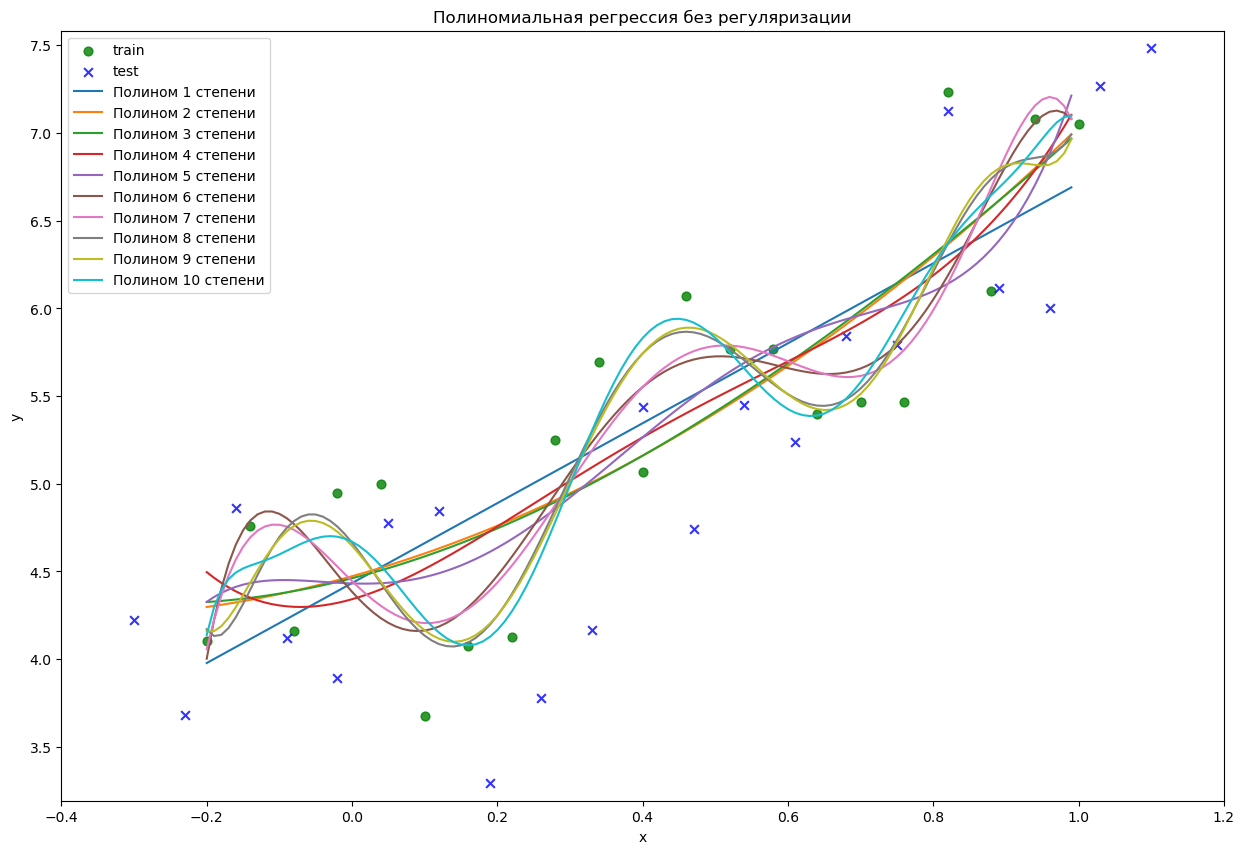

In [40]:
# Задание 1. Полиномиальная регрессия (на основе нормального уравнения). Построение полученных полиномов
             
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
width = 15
height = 10
m = 0.1

plt.figure(figsize=(width, height))
plt.title('Полиномиальная регрессия без регуляризации')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='train')
plt.scatter(X_test, y_test, 40, 'b', 'x', alpha=0.8, label='test')

x = np.arange(X_train.min(), X_train.max(), 0.01)
x_min = min(X_train.min(), X_test.min())
x_max = max(X_train.max(), X_test.max())
y_min = min(y_train.min(), y_test.min())
y_max = max(y_train.max(), y_test.max())

for i in range(count):
    #plt.plot(X_train, arr_y_predict_train[i], color = colors[i], label='Полином '+str(i + min_degree)+' степени')
    poly = PolynomialFeatures(i+min_degree, include_bias=False)
    x_poly = poly.fit_transform(x.reshape(-1,1))
    y = f_reg(x_poly, arr_w[i])
    
    plt.plot(x, y, color = colors[i], label='Полином '+str(i + min_degree)+' степени')
    plt.xlim(x_min - m, x_max + m)
    plt.ylim(y_min - m, y_max + m)
    plt.legend(loc = 'best', prop = {'size': 10})

plt.show()

Постройте графики зависимости  𝑀𝑆𝐸 на обучающих и тестовых данных в зависимости от степени полинома (должно быть три графика: один для обучающих данных, второй – для тестовых, третий – для обоих видов данных вместе).

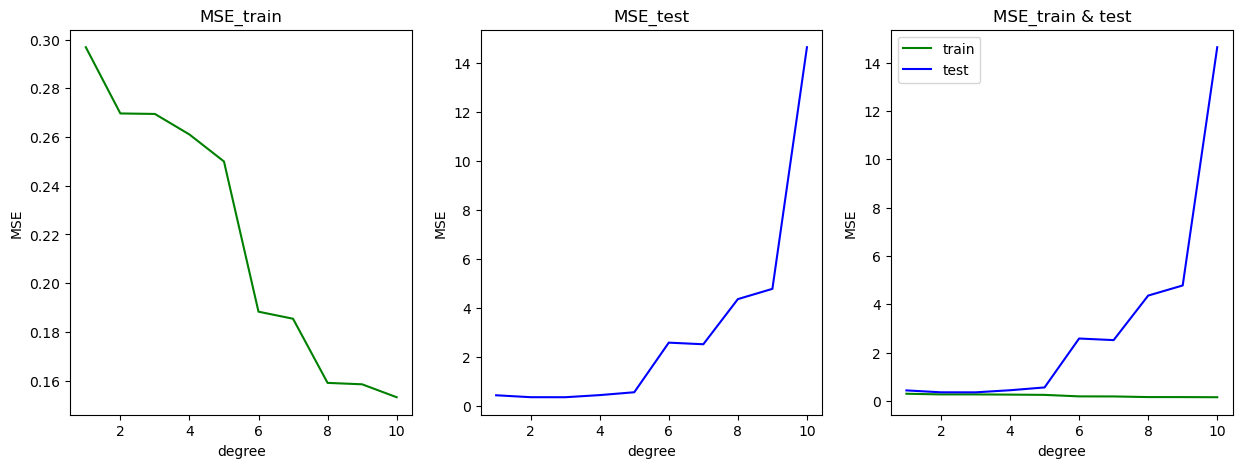

In [41]:
# Задание 1. Построение графиков зависимости функции ошибки от степени полинома
width = 15
height = 5
m = 1
plt.figure(figsize=(width, height))
x = [i+1 for i in range(count)]
# 1-ый график - ошибка на обучающем наборе
sp = plt.subplot(131)
plt.plot(x, mse_train, color = 'green', label='train')
plt.title('MSE_train')
plt.xlabel('degree')
plt.ylabel('MSE')
# 2-ой график - ошибка на тестовом наборе
sp = plt.subplot(132)
plt.plot(x, mse_test, color = 'blue', label='test')
plt.title('MSE_test')
plt.xlabel('degree')
plt.ylabel('MSE')
# 3-ий график - графики ошибок на обучающем и тестовом наборах
sp = plt.subplot(133)
plt.plot(x, mse_train, color = 'green', label='train')
plt.plot(x, mse_test, color = 'blue', label='test')
plt.legend(loc = 'best', prop = {'size': 10})
plt.title('MSE_train & test')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()

In [42]:
best_degree_WD = mse_test.index(min(mse_test)) + min_degree
print('Вывод: наилучший результат достигается при', best_degree_WD, 'степени. При дальнейшем увеличении степени полинома происходит переобучение.')

Вывод: наилучший результат достигается при 3 степени. При дальнейшем увеличении степени полинома происходит переобучение.


In [43]:
# Вычисление градиента
def gradient(X, y, w):
    return 2 * np.dot(X.T, np.dot(X, w) - y) / y.shape[0]

In [44]:
# Обобщенный вариант функции градиентного спуска

# По умолчанию (learn_rate=0.5, n_iter=100, eps=1e-06, batch_size=len(y), stochastic=False) - классический градиентный спуск
# При задании stochastic = True и batch_size < len(y) - стохастический по мини-батчам

def gradient_descent_all(X, y, w, learn_rate=0.5, n_iter=100, eps=1e-06, batch_size=None, stochastic=False):
    if stochastic:
        n_obs = X.shape[0] # Количество наблюдений (значений)
        xy = np.c_[X.reshape(n_obs, 1), y.reshape(n_obs, 1)] # Объединение массивов x и y в один
    
    k_iter = 0
    n = learn_rate
    for _ in range(n_iter):
        if stochastic:
            rng.shuffle(xy) # Перемешивание x и y
            start = np.random.randint(n_obs-batch_size) # Выбор случайного значения
            stop = start + batch_size
            x_batch, y_batch = np.array(xy[start:stop, :-1].ravel().tolist()), np.array(xy[start:stop, -1:].ravel().tolist()) # Формирование мини-батча и разделение x и y
        else:
            x_batch = X
            y_batch = y
        
        x_batch = np.column_stack([np.ones(x_batch.shape[0]).T, x_batch])            
        
        diff = learn_rate * gradient(x_batch, y_batch, w)
        w -= diff
        
        k_iter += 1    
        if np.all(np.abs(diff) <= eps):
            break     
        learn_rate -= n / n_iter
    return w, k_iter

Степень =  1 w =  [4.43322888 2.27913924]  Количество итераций =  57 
MSE_train =  0.29689663326550175 	r2_train =  0.6978349896087546 
MSE_test =  0.4351200426630282 	r2_test =  0.6848802474567308 

Степень =  2 w =  [4.46777532 1.23787118 1.30795305]  Количество итераций =  120 
MSE_train =  0.2698238332895396 	r2_train =  0.7253881915298463 
MSE_test =  0.35818286980079644 	r2_test =  0.7405991767097804 

Степень =  3 w =  [4.48839083 1.26854894 0.83757149 0.47022463]  Количество итераций =  120 
MSE_train =  0.2705034571365466 	r2_train =  0.7246965078804418 
MSE_test =  0.3598571710484469 	r2_test =  0.7393866253604713 

Степень =  4 w =  [4.48921968 1.3302396  0.75296384 0.29864169 0.20365335]  Количество итераций =  120 
MSE_train =  0.27048136379405646 	r2_train =  0.7247189932653035 
MSE_test =  0.3625575421974167 	r2_test =  0.7374309804698558 

Степень =  5 w =  [4.48837563 1.35998961 0.73899669 0.24244025 0.11687512 0.13628046]  Количество итераций =  120 
MSE_train =  0.27

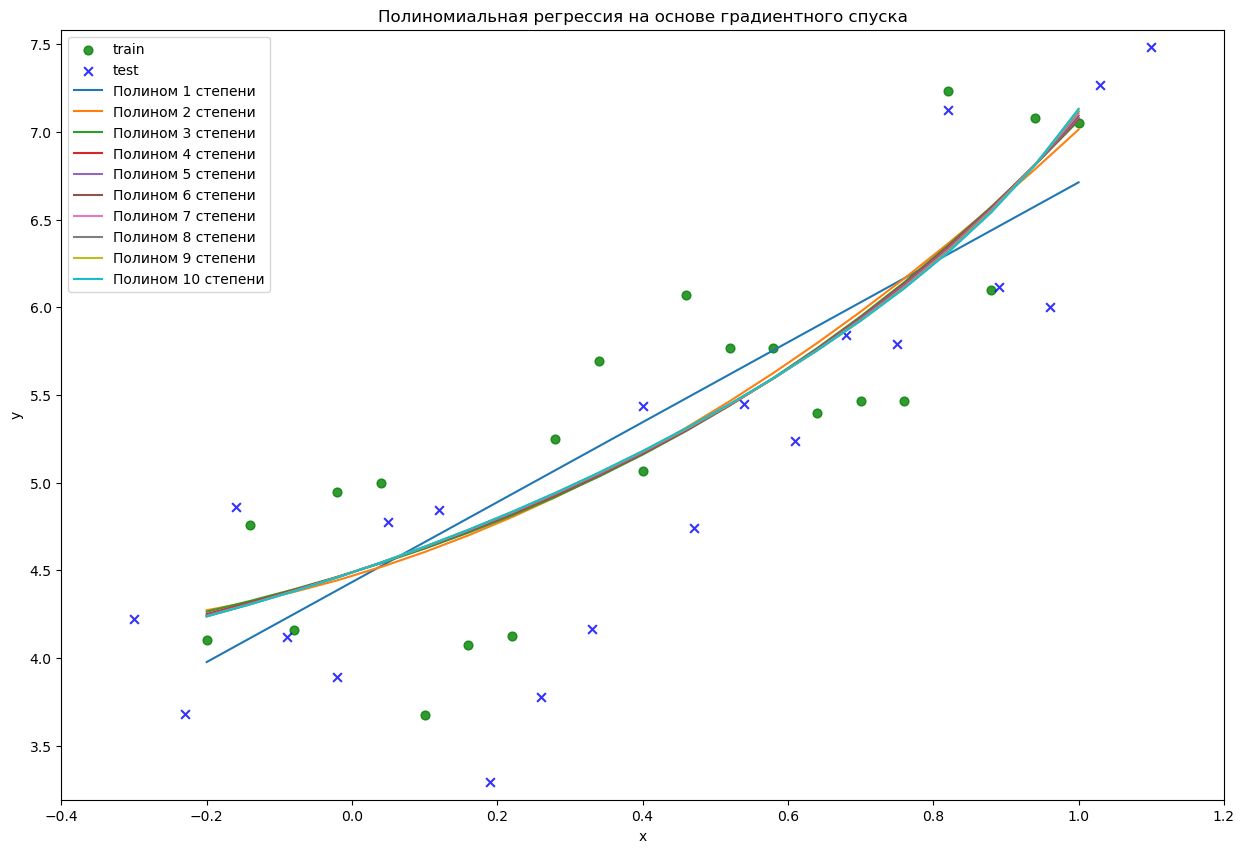

In [45]:
# Градиентный спуск
rng = np.random.default_rng()

mse_train = []
r2_train = []
mse_test = []
r2_test = []
arr_w = []

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
width = 15
height = 10
m = 0.1
plt.figure(figsize=(width, height))
x_min = min(X_train.min(), X_test.min())
x_max = max(X_train.max(), X_test.max())
y_min = min(y_train.min(), y_test.min())
y_max = max(y_train.max(), y_test.max())
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='train')
plt.scatter(X_test, y_test, 40, 'b', 'x', alpha=0.8, label='test')
plt.xlim(x_min - m, x_max + m)
plt.ylim(y_min - m, y_max + m)
plt.legend(loc = 'best', prop = {'size': 10})

count = 10
min_degree = 1
for i in range(count):
    # Создание полиномиальных признаков
    poly = PolynomialFeatures(i + min_degree, include_bias=False)
    X_poly_train = poly.fit_transform(X_train.reshape(-1,1))
    X_poly_test = poly.fit_transform(X_test.reshape(-1,1))
    w_0 = np.ones(X_poly_train.shape[1] + 1)
    w, k = gradient_descent_all(X_poly_train, y_train, w_0, learn_rate=1, n_iter = 120)
    #w, k = gradient_descent(X_poly_train, y_train, w, learn_rate=0.5, n_iter=100, eps=1e-06, batch_size=len(y), stochastic=False)
    arr_w.append(w)
    y_predict_train = f_reg(X_poly_train, w)
    plt.plot(X_train, y_predict_train, color = colors[i], label='Полином '+str(i + min_degree)+' степени')
    plt.legend(loc = 'best', prop = {'size': 10})
    mse_train.append(mean_squared_error(y_train, y_predict_train))
    r2_train.append(r2_score(y_train, y_predict_train))
    y_predict_test = f_reg(X_poly_test, w)
    mse_test.append(mean_squared_error(y_test, y_predict_test))
    r2_test.append(r2_score(y_test, y_predict_test))
    print('Степень = ', i + min_degree, 'w = ', w, ' Количество итераций = ', k, '\nMSE_train = ', mse_train[i], '\tr2_train = ', r2_train[i], '\nMSE_test = ', mse_test[i], '\tr2_test = ', r2_test[i],'\n')
    #val_err(X_poly_train, y, mse_train, r2_train)

plt.title('Полиномиальная регрессия на основе градиентного спуска')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

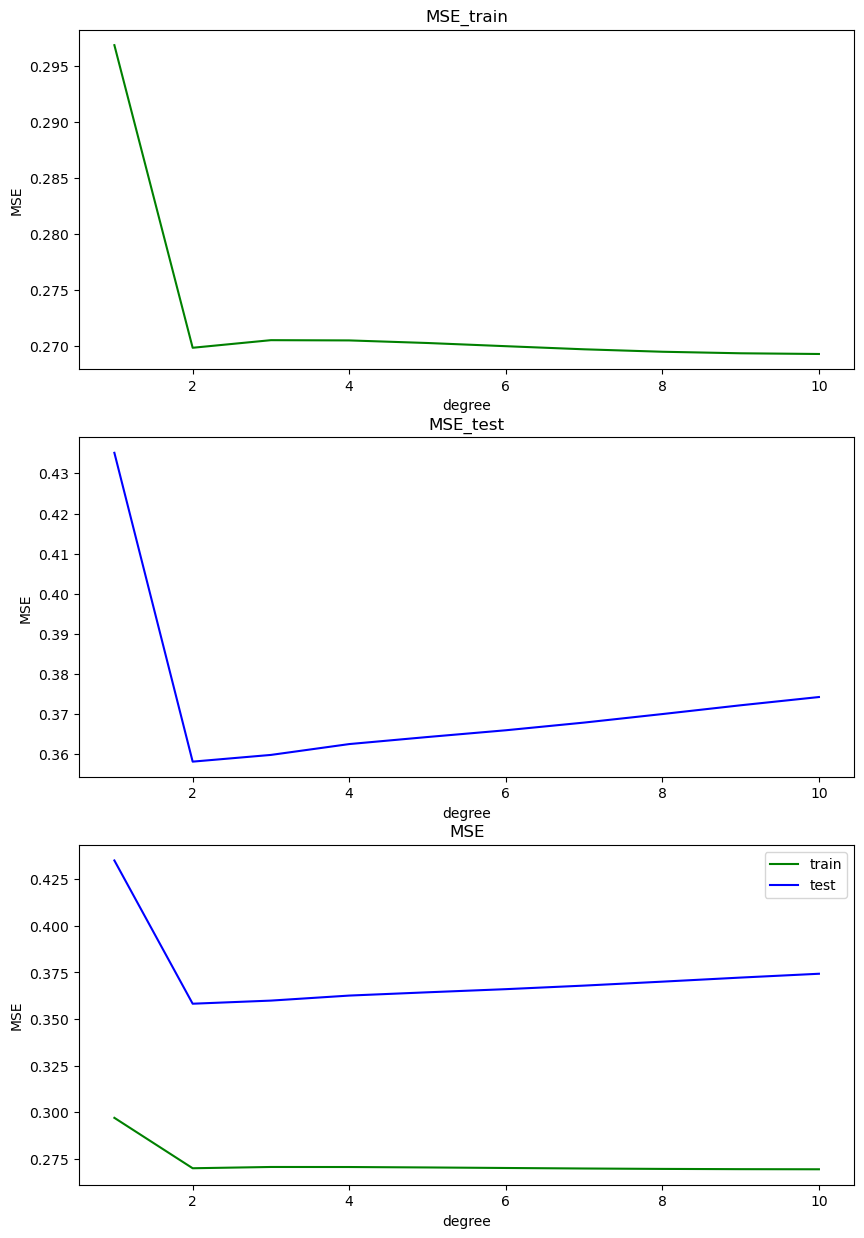

In [46]:
# Построение графиков функции ошибки
width = 10
height = 15
m = 1
plt.figure(figsize=(width, height))
x = [i+1 for i in range(count)]
#subplot train
sp = plt.subplot(311)
plt.plot(x, mse_train, color = 'green', label='train')
plt.title('MSE_train')
plt.xlabel('degree')
plt.ylabel('MSE')
#subplot test
sp = plt.subplot(312)
plt.plot(x, mse_test, color = 'blue', label='test')
plt.title('MSE_test')
plt.xlabel('degree')
plt.ylabel('MSE')
#subplot train and test
sp = plt.subplot(313)
plt.plot(x, mse_train, color = 'green', label='train')
plt.plot(x, mse_test, color = 'blue', label='test')
plt.legend(loc = 'best', prop = {'size': 10})
plt.title('MSE')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()

In [47]:
best_degree_GD = mse_test.index(min(mse_test)) + 1
print('Вывод: наилучший результат достигается при', best_degree_GD, 'степени. При дальнейшем увеличении степени полинома результат практически не меняется.')

Вывод: наилучший результат достигается при 2 степени. При дальнейшем увеличении степени полинома результат практически не меняется.


### Задание 2. Регуляризация

Вспомним, что задачу линейной регрессии (нахождение вектора коэффициентов $\overrightarrow{w}_{opt}$) можно решить при помощи нормального уравнения:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Если строки или столбцы матрицы $X$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не может быть решена с помощью нормального уравнения (придется использовать, например, градиентный спуск). На практике различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место *переобучение* (overfitting). Один из симптомов этой проблемы – необычно большие по модулю компоненты вектора $\overrightarrow{w}_{opt}$.

Один из способов борьбы с переобучением – **регуляризация**. Сейчас мы рассмотрим одну из её разновидностей – **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \alpha I)$, где $\alpha$ – параметр регуляризации, $I$ – единичная матрица. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение:

$$\overrightarrow{w}_{opt} = (X^TX + \alpha I)^{-1}X^T\overrightarrow{y}$$

и снижаем эффект переобучения. Параметр $\alpha$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации полиномом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным параметром $\alpha$, ошибку на тестовой выборке можно сделать не больше, чем для полинома оптимальной степени в модели без регуляризации. Для этого $\alpha$ сравните $\det(X^TX)$ и $\det(X^TX + \alpha I)$.

Изобразите на графике три полинома: полином оптимальной степени без регуляризации, полином шестой степени без регуляризации и полином шестой степени с регуляризацией.

In [48]:
# Выше описана функция нахождения вектора весов на основе нормального уравнения с L2-регуляризацией (a != 0)
# get_weight(X, y, a=0):
#    X = np.column_stack([np.ones(X.shape[0]).T, X])
#    w = np.dot(np.linalg.inv(np.dot(X.T, X) + a * np.eye(X.shape[1])), np.dot(X.T, y))
#    return w  # Возвращаем вектор весов

In [49]:
alpha_values = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]
# Создание полиномиальных признаков
X_poly_train, X_poly_test = create_PolynomialFeatures(6, X_train, X_test)
mse_train = []
r2_train = []
mse_test = []
r2_test = []
arr_w = []
for a in alpha_values:
    w = get_weight(X_poly_train, y_train, a)
    arr_w.append(w)
    y_predict_train = f_reg(X_poly_train, w)
    mse_train.append(mean_squared_error(y_train, y_predict_train))
    r2_train.append(r2_score(y_train, y_predict_train))
    y_predict_test = f_reg(X_poly_test, w)
    mse_test.append(mean_squared_error(y_test, y_predict_test))
    r2_test.append(r2_score(y_test, y_predict_test))
    print('alpha =', a, '\nw = ', w, '\nMSE_train = ', mse_train[len(mse_train)-1], '\tr2_train = ', r2_train[len(r2_train)-1], '\nMSE_test = ', mse_test[len(mse_train)-1], '\tr2_test = ', r2_test[len(r2_train)-1],'\n')
best_alpha = alpha_values[mse_test.index(min(mse_test))]
print('Вывод: наилучший результат достигается при alpha =', best_alpha)   

alpha = 0.001 
w =  [ 4.39055368  0.91953667  4.63816382 -2.59722024 -4.18499044  0.83167851
  3.22549491] 
MSE_train =  0.2575436070119063 	r2_train =  0.7378863282044701 
MSE_test =  0.43352472165349265 	r2_test =  0.6860356002616146 

alpha = 0.01 
w =  [ 4.455223    1.25220638  1.92079399 -0.79827818 -0.90701785  0.10171364
  1.10984809] 
MSE_train =  0.26474831691886413 	r2_train =  0.7305537720216757 
MSE_test =  0.3745073239712567 	r2_test =  0.7287767887381392 

alpha = 0.02 
w =  [ 4.46667564  1.30815544  1.36842764 -0.3250841  -0.436112    0.08617057
  0.64872211] 
MSE_train =  0.2670533315302581 	r2_train =  0.7282078553423815 
MSE_test =  0.36765038586965637 	r2_test =  0.7337426749900262 

alpha = 0.03 
w =  [ 4.46980211  1.32604546  1.15288988 -0.13094104 -0.25225871  0.08255348
  0.46231983] 
MSE_train =  0.2680778198457224 	r2_train =  0.7271651876668235 
MSE_test =  0.3647285073632987 	r2_test =  0.735858738470462 

alpha = 0.04 
w =  [ 4.47037494  1.33307987  1.039573

In [50]:
# Сравним определители det(X.T*X) и det(X.T*X + alpha*I)
X = np.column_stack([np.ones(X_poly_train.shape[0]).T, X_poly_train])
print('det(X.T*X) =', np.linalg.det(np.dot(X.T, X)))
print('det(X.T*X + alpha*I) =', np.linalg.det(np.dot(X.T, X) + best_alpha * np.eye(X.shape[1])))

det(X.T*X) = 9.0828648373504e-12
det(X.T*X + alpha*I) = 509.2164507942177


Изобразите на графике три полинома: полином оптимальной степени без регуляризации, полином шестой степени без регуляризации и полином шестой степени с регуляризацией.

Сравнение с полином 3-ей степени без регуляризации (лучшая степень полинома на основе нормального уравнения)

In [51]:
X_poly_train, X_poly_test = create_PolynomialFeatures(6, X_train, X_test)

w6 = get_weight(X_poly_train, y_train, a = 0) # Полином 6-ой степени без регуляризации
w6_a = get_weight(X_poly_train, y_train, a = best_alpha) # Полином 6-ой степени с регуляризацией (a = 1)
y6_predict_train = f_reg(X_poly_train, w6)
y6_a_predict_train = f_reg(X_poly_train, w6_a)

X_poly_train, X_poly_test = create_PolynomialFeatures(best_degree_WD, X_train, X_test)
w_best = get_weight(X_poly_train, y_train, a = 0) # Полином 3-ей степени без регуляризации (лучшая степень полинома на основе нормального уравнения)
y_best_predict_train = f_reg(X_poly_train, w_best)

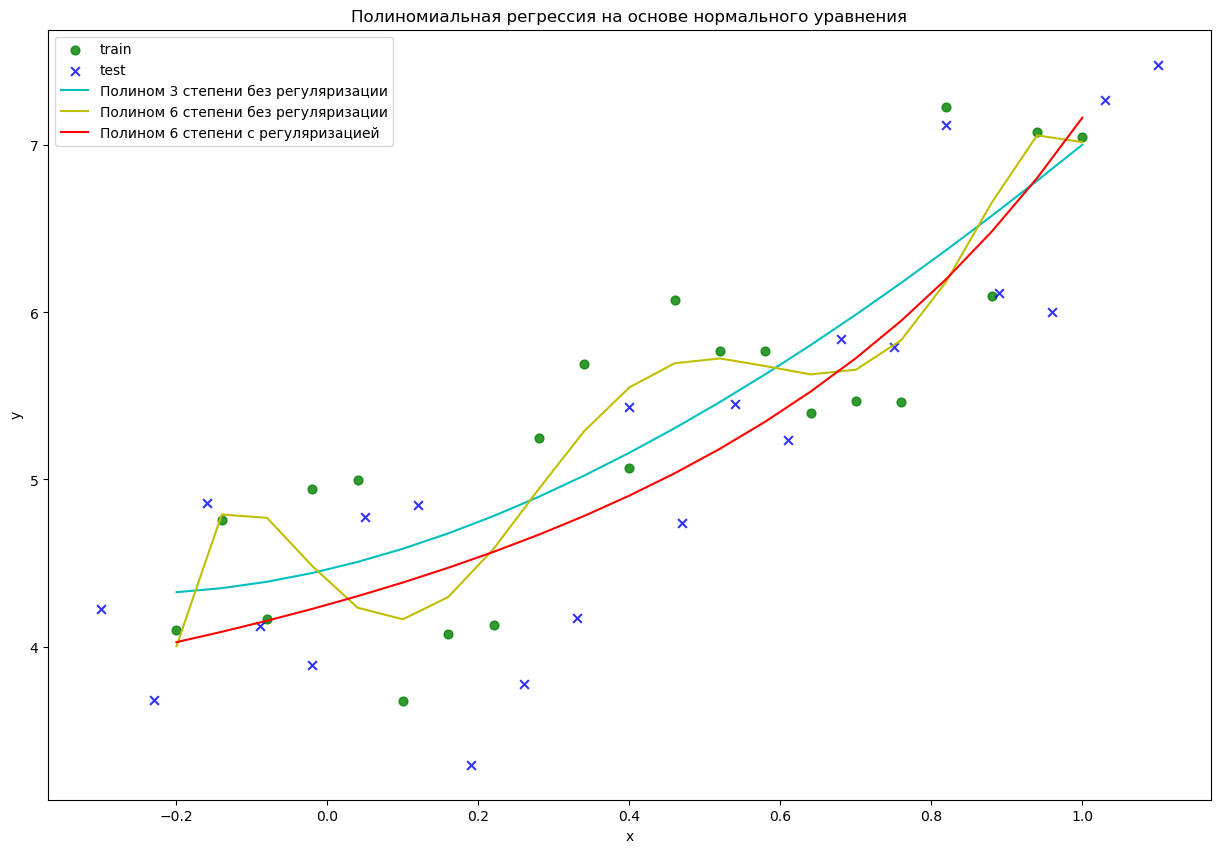

In [52]:
# Построение графиков
width = 15
height = 10
m = 0.1
plt.figure(figsize=(width, height))
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='train')
plt.scatter(X_test, y_test, 40, 'b', 'x', alpha=0.8, label='test')
plt.plot(X_train, y_best_predict_train, 'c', label='Полином ' + str(best_degree_WD) + ' степени без регуляризации')
plt.plot(X_train, y6_predict_train, 'y', label='Полином 6 степени без регуляризации')
plt.plot(X_train, y6_a_predict_train, 'r', label='Полином 6 степени с регуляризацией')
plt.legend(loc = 'best', prop = {'size': 10})
plt.title('Полиномиальная регрессия на основе нормального уравнения')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Задание 3. Линейная регрессия в scikit-learn

Скачайте файлы ``flats_moscow.txt`` и ``flats_moscow_description.pdf``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью линейной регрессии зависимость между ценой квартиры и остальными доступными параметрами.

Построив несколько моделей, нужно сравнить их качество. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с полиномами: как хорошо падала ошибка на обучающей выборке с ростом степени и как быстро росла ошибка на тестовых данных!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели набора данных упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

Постройте следующие модели линейной регрессии по методу наименьших квадратов:

1. на основе собственной функции (нормальное уравнение);

1. с L2-регуляризацией на основе собственной функции – параметр регуляризации нужно подобрать;

1. собственную реализацию полиномиальной регрессии – степень полинома нужно подобрать;

1. на основе функции `LinearRegression` из `scikit-learn`;

1. с L2-регуляризацией на основе функции `Ridge` из `scikit-learn` – параметр регуляризации нужно подобрать;

1. с L1-регуляризацией на основе функции `Lasso` из `scikit-learn` – параметр регуляризации нужно подобрать.

Выведите и сравните регрессионные коэффициенты для всех функций. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество решения задачи, выведя среднеквадратическую ошибку на обучающих и тестовых данных для всех функций. Эти ошибки лучше свести в таблицу (например, используя `pandas.DataFrame`).

In [53]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv('flats_moscow.txt', sep='\t')
print(df.head())

   price  totsp  livesp  kitsp  dist  metrdist
0     81     58      40    6.0  12.5         7
1     75     44      28    6.0  13.5         7
2    128     70      42    6.0  14.5         3
3     95     61      37    6.0  13.5         7
4    330    104      60   11.0  10.5         7


In [55]:
X = df.drop(columns=['price']) # В признаки занесем все без порядкового номера и стоимости
y = df['price'] # В значения занесем стоимость
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=42) # Случайное разделение на train и test в отношении 2:1 

In [56]:
# Функция нахождения значений по линейной функции с предсказанными весовыми коэффициентами
def f_reg(X, w):
    X = np.column_stack([np.ones(X.shape[0]).T, X])
    y_predict = np.dot(w, X.T)
    return y_predict

In [57]:
def f_err(X_train, y_train, X_test, y_test, w, df_mse_r2, i, s):
    y_predict_train = f_reg(X_train, w)
    mse_train = mean_squared_error(y_train, y_predict_train)
    r2_train = r2_score(y_train, y_predict_train)
    y_predict_test = f_reg(X_test, w)
    mse_test = mean_squared_error(y_test, y_predict_test)
    r2_test = r2_score(y_test, y_predict_test)
    df_mse_r2.loc[i] = [s, mse_train, mse_test, r2_train, r2_test]
    return df_mse_r2

In [58]:
# Полиномиальная регрессия на основе нормального уравнения
def poly_reg1(X_train, X_test, y_train, degree):
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)    
    #w_0 = np.ones(X_poly_train.shape[1] + 1)
    w = get_weight(X_poly_train, y_train)
    return X_poly_train, X_poly_test, w

In [59]:
def model_1(model_name, i, df_mse_r2, X_train, y_train, X_test, y_test):
    print('\n' + str(i) + '. ' + model_name)
    w = get_weight(X_train, y_train)
    print('w = ', w)
    df_mse_r2 = f_err(X_train, y_train, X_test, y_test, w, df_mse_r2, i, model_name)
    return df_mse_r2

def model_2(model_name, i, df_mse_r2, X_train, y_train, X_test, y_test):
    print('\n' + str(i) + '. ' + model_name)
    alpha_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    mse_train = []
    mse_test = []
    arr_w = []
    for a in alpha_values:
        w = get_weight(X_train, y_train, a)
        arr_w.append(w)
        y_predict_train = f_reg(X_train, w)
        mse_train.append(mean_squared_error(y_train, y_predict_train))
        y_predict_test = f_reg(X_test, w)
        mse_test.append(mean_squared_error(y_test, y_predict_test))
    w = arr_w[mse_test.index(min(mse_test))]
    alpha = alpha_values[mse_test.index(min(mse_test))]
    print('alpha =', alpha, '\tw = ', w)
    df_mse_r2 = f_err(X_train, y_train, X_test, y_test, w, df_mse_r2, i, model_name)
    return df_mse_r2
    
def model_3(model_name, i, df_mse_r2, X_train, y_train, X_test, y_test):
    print('\n' + str(i) + '. ' + model_name)
    count = 3
    min_degree = 1
    best_mse_train = 1e+10
    best_mse_test = 1e+10
    best_w = []
    best_X_train = []
    best_X_test = []

    for d in range(count):
        X_tr = np.array(X_train)
        X_te = np.array(X_test)
        y_tr = np.array(y_train)
        y_te = np.array(y_test)
        X_poly_train, X_poly_test, w = poly_reg1(np.array(X_tr), np.array(X_te), np.array(y_tr), d + min_degree)
        if len(w) != 0:
            y_predict_train = f_reg(X_poly_train, w)
            y_predict_test = f_reg(X_poly_test, w)
    
            mse_tr = mean_squared_error(y_tr, y_predict_train)
            
            mse_te = mean_squared_error(y_te, y_predict_test)
    
            if mse_te < best_mse_test:
                best_mse_train = mse_tr
                best_mse_test = mse_te
                best_w = w
                best_X_train = X_poly_train
                best_X_test = X_poly_test
                best_degree = d+min_degree
        
    print('degree =', best_degree, '\tw = ', best_w)
    df_mse_r2 = f_err(best_X_train, y_tr, best_X_test, y_te, best_w, df_mse_r2, i, model_name)
    return df_mse_r2

def model_4(model_name, i, df_mse_r2, X_train, y_train, X_test, y_test):
    print('\n' + str(i) + '. ' + model_name)
    # Обучение модели
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Оценка модели
    w = np.concatenate([[model.intercept_], model.coef_])
    print('w = ', w)
    df_mse_r2 = f_err(X_train, y_train, X_test, y_test, w, df_mse_r2, i, model_name)
    return df_mse_r2

def model_5(model_name, i, df_mse_r2, X_train, y_train, X_test, y_test):
    print('\n' + str(i) + '. ' + model_name)
    best_mse = 1e+10
    best_w = []
    alpha_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    for alpha in alpha_values:
        # Обучение модели
        model = Ridge(alpha)
        model.fit(X_train, y_train)
        # Оценка модели
        w = np.concatenate([[model.intercept_], model.coef_])
        y_predict = f_reg(X_test, w)
        mse = mean_squared_error(y_test, y_predict)
        if mse < best_mse:
            best_mse = mse
            best_w = w
            best_alpha = alpha
    print('alpha =', best_alpha,'\tw = ', best_w)
    df_mse_r2 = f_err(X_train, y_train, X_test, y_test, w, df_mse_r2, i, model_name)
    return df_mse_r2

def model_6(model_name, i, df_mse_r2, X_train, y_train, X_test, y_test):
    print('\n' + str(i) + '. ' + model_name)
    best_mse = 1e+10
    best_w = []
    alpha_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    for alpha in alpha_values:
        # Обучение модели
        model = Lasso(alpha)
        model.fit(X_train, y_train)
        # Оценка модели
        w = np.concatenate([[model.intercept_], model.coef_])
        y_predict = f_reg(X_test, w)
        mse = mean_squared_error(y_test, y_predict)
        if mse < best_mse:
            best_mse = mse
            best_w = w
            best_alpha = alpha
    print('alpha =', best_alpha,'\tw = ', best_w)
    df_mse_r2 = f_err(X_train, y_train, X_test, y_test, w, df_mse_r2, i, model_name)
    return df_mse_r2

In [60]:
i = 0
df_mse_r2 = pd.DataFrame({'model': [], 'mse_train': [], 'mse_test': [], 'r2_train': [], 'r2_test': []}) # Датафрейм для сравнения качества решения задачи

i += 1
model_1('На основе собственной функции (нормальное уравнение)', i, df_mse_r2, X_train, y_train, X_test, y_test)

i += 1
model_2('L2-регуляризация на основе собственной функции', i, df_mse_r2, X_train, y_train, X_test, y_test)

i += 1
model_3('Cобственная реализация полиномиальной регрессии', i, df_mse_r2, X_train, y_train, X_test, y_test)

i += 1
model_4('На основе функции LinearRegression', i, df_mse_r2, X_train, y_train, X_test, y_test)

i += 1
model_5('C L2-регуляризацией на основе функции Ridge', i, df_mse_r2, X_train, y_train, X_test, y_test)

i += 1
model_6('C L1-регуляризацией на основе функции Lasso', i, df_mse_r2, X_train, y_train, X_test, y_test)

# Вывод ошибок на обучающем и тестовом наборах для построенных функций
print('\nСреднеквадратичные ошибки на обучающем и тестовом наборах для построенных функций\n')
print(df_mse_r2)


1. На основе собственной функции (нормальное уравнение)
w =  [-13.56375539   1.50592246   1.32591493   2.07801758  -3.45754795
  -1.30314818]

2. L2-регуляризация на основе собственной функции
alpha = 0.01 	w =  [-13.55785259   1.50594346   1.32580143   2.0779864   -3.45767451
  -1.30319952]

3. Cобственная реализация полиномиальной регрессии
degree = 2 	w =  [ 2.97856699e+01  3.64385221e+00 -5.44314342e+00  4.63227451e+00
  1.87698507e+00  3.93648971e-01  2.05981553e-02 -5.91534687e-02
 -1.41856811e-01 -1.74634039e-01  1.06178262e-01  8.46111881e-02
  2.46630760e-01  1.27536659e-01 -1.64292136e-01  5.98048773e-04
 -8.31254688e-02 -3.06028781e-01  1.13274544e-01 -2.13584709e-02
  8.02070180e-02]

4. На основе функции LinearRegression
w =  [-13.56375539   1.50592246   1.32591493   2.07801758  -3.45754795
  -1.30314818]

5. C L2-регуляризацией на основе функции Ridge
alpha = 50 	w =  [-13.68860001   1.51126602   1.32229809   2.05229855  -3.44699657
  -1.30134313]

6. C L1-регуляризацией

C:\ProgramData\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


>_Вывод: Знаки "-" у коэффициентов при dist и metrdist говорят о том, что эти параметры отрицательно сказываются на цене (чем больше расстояние, тем ниже цена). Аналогично, признак totsp (площадь квартиры) - чем больше плдощадь, тем ниже стоимость квадратного метра_

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки (не менее трёх), являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

In [61]:
# Формирование нового набора признаков
def init_new_X(f, X_train, X_test):
    # Добавляем значения выбранной функции для признаков
    f_X_train = f(X_train)
    new_X_train = np.concatenate((X_train, f_X_train), axis = 1)
    f_X_test = f(X_test)
    new_X_test = np.concatenate((X_test, f_X_test), axis = 1)
    return new_X_train, new_X_test
    
# Функция добавления признаков
def func_2(X):
    X = np.array(X)
    new_X = np.array([]).reshape(X.shape[0], 0)
    new_column = np.multiply(X[:, 1]+ X[:, 2], X[:,4]) # Добавление произведения суммы площадей кухни и жилой площади на расстояние до метро
    new_X = np.column_stack((new_X, new_column)) 
    new_column = X[:, 1]**3 # Добавление куба площади жилой
    new_X = np.column_stack((new_X, new_column))
    new_column = X[:, 2]**2 # Добавление квадрата площади кухни
    new_X = np.column_stack((new_X, new_column))
    new_column = X[:, 3]**(-1) # Добавление единицы, деленной на расстояние от центра
    new_X = np.column_stack((new_X, new_column))
    new_column = X[:, 4]**(-1) # Добавление единицы, деленной на расстояние от метро
    new_X = np.column_stack((new_X, new_column))
    new_column = (X[:, 0] - X[:, 1] - X[:, 2])**(-1) # Добавление единицы, деленной на "бесполезную площадь"
    new_X = np.column_stack((new_X, new_column))
    return new_X

min_mse_test = 1e+10
best_func = ''
# Формирование нового набора признаков
new_X_train, new_X_test = init_new_X(func_2, X_train, X_test)
#print(new_X_train.shape)

i += 1
model_1('new_X На основе собственной функции (нормальное уравнение)', i, df_mse_r2, new_X_train, y_train, new_X_test, y_test)

i += 1
model_2('new_X L2-регуляризация на основе собственной функции', i, df_mse_r2, new_X_train, y_train, new_X_test, y_test)

i += 1
model_3('new_X Cобственная реализация полиномиальной регрессии', i, df_mse_r2, new_X_train, y_train, new_X_test, y_test)

i += 1
model_4('new_X На основе функции LinearRegression', i, df_mse_r2, new_X_train, y_train, new_X_test, y_test)

i += 1
model_5('new_X C L2-регуляризацией на основе функции Ridge', i, df_mse_r2, new_X_train, y_train, new_X_test, y_test)

i += 1
model_6('new_X C L1-регуляризацией на основе функции Lasso', i, df_mse_r2, new_X_train, y_train, new_X_test, y_test)

# Вывод ошибок на обучающем и тестовом наборах для построенных функций
print('\nСреднеквадратичные ошибки на обучающем и тестовом наборах для построенных функций\n')
print(df_mse_r2)


7. new_X На основе собственной функции (нормальное уравнение)
w =  [ 3.97123426e+01  1.20856319e+00 -9.77177049e-01  5.15258273e+00
 -2.65222032e+00  3.21524223e+00 -7.32545698e-02  3.56569037e-04
 -9.32825236e-02  5.73217046e+01  1.02568310e+01 -5.70050047e+01]

8. new_X L2-регуляризация на основе собственной функции
alpha = 0.01 	w =  [ 3.91120218e+01  1.21838481e+00 -9.82456290e-01  5.17178213e+00
 -2.65971283e+00  3.22277771e+00 -7.33732375e-02  3.56004535e-04
 -9.43909998e-02  5.68342455e+01  1.02722797e+01 -5.33344799e+01]

9. new_X Cобственная реализация полиномиальной регрессии
degree = 1 	w =  [ 3.97123426e+01  1.20856319e+00 -9.77177049e-01  5.15258273e+00
 -2.65222032e+00  3.21524223e+00 -7.32545698e-02  3.56569037e-04
 -9.32825236e-02  5.73217046e+01  1.02568310e+01 -5.70050047e+01]

10. new_X На основе функции LinearRegression
w =  [ 3.97123426e+01  1.20856319e+00 -9.77177049e-01  5.15258273e+00
 -2.65222032e+00  3.21524223e+00 -7.32545698e-02  3.56569037e-04
 -9.32825236

C:\ProgramData\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


alpha = 0.01 	w =  [ 3.93361737e+01  1.21741540e+00 -9.84662834e-01  5.16801487e+00
 -2.66164126e+00  3.21607987e+00 -7.32575506e-02  3.56259849e-04
 -9.42317200e-02  5.67319430e+01  1.02679388e+01 -5.36968388e+01]

12. new_X C L1-регуляризацией на основе функции Lasso
alpha = 0.05 	w =  [ 4.72997941e+01  1.35248460e+00 -1.07348242e+00  5.38522569e+00
 -3.52508363e+00  3.14743637e+00 -7.42431422e-02  3.50412577e-04
 -1.07982079e-01  0.00000000e+00  5.79569747e+00 -0.00000000e+00]

Среднеквадратичные ошибки на обучающем и тестовом наборах для построенных функций

                                                model    mse_train  \
1   На основе собственной функции (нормальное урав...   863.178410   
2      L2-регуляризация на основе собственной функции   863.178411   
3     Cобственная реализация полиномиальной регрессии   733.067788   
4                  На основе функции LinearRegression   863.178410   
5         C L2-регуляризацией на основе функции Ridge   863.181639   
6         C